In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3


In [2]:
data = {
    "date": pd.date_range(start="2024-01-01", periods=10, freq="D"),
    "product": ["A", "B", "A", "C", "B", "A", "C", "B", "A", "C"],
    "region": ["North", "South", "North", "East", "West", "South", "East", "West", "North", "South"],
    "quantity": [10, 5, 7, 3, 8, 6, 4, 9, 11, 2],
    "price": [100, 120, 100, 90, 120, 100, 90, 120, 100, 90]
}

df = pd.DataFrame(data)
df


,date,product,region,quantity,price
0,2024-01-01,A,North,10,100
1,2024-01-02,B,South,5,120
2,2024-01-03,A,North,7,100
3,2024-01-04,C,East,3,90
4,2024-01-05,B,West,8,120
5,2024-01-06,A,South,6,100
6,2024-01-07,C,East,4,90
7,2024-01-08,B,West,9,120
8,2024-01-09,A,North,11,100
9,2024-01-10,C,South,2,90


In [3]:
df["revenue"] = df["quantity"] * df["price"]
df


,date,product,region,quantity,price,revenue
0,2024-01-01,A,North,10,100,1000
1,2024-01-02,B,South,5,120,600
2,2024-01-03,A,North,7,100,700
3,2024-01-04,C,East,3,90,270
4,2024-01-05,B,West,8,120,960
5,2024-01-06,A,South,6,100,600
6,2024-01-07,C,East,4,90,360
7,2024-01-08,B,West,9,120,1080
8,2024-01-09,A,North,11,100,1100
9,2024-01-10,C,South,2,90,180


In [4]:
df.describe()
revenue_by_product = df.groupby("product")["revenue"].sum()
revenue_by_product

product
A    3400
B    2640
C     810
Name: revenue, dtype: int64

In [5]:
df.to_csv("../data/sales_data.csv", index=False)
print("CSV file saved successfully")


CSV file saved successfully


In [6]:
conn = sqlite3.connect("../data/sales.db")
df.to_sql("sales", conn, if_exists="replace", index=False)
conn.close()

print("SQLite database created successfully")


SQLite database created successfully


In [7]:
conn = sqlite3.connect("../data/sales.db")

query = """
SELECT product, SUM(revenue) AS total_revenue
FROM sales
GROUP BY product
ORDER BY total_revenue DESC
"""

pd.read_sql(query, conn)


,product,total_revenue
0,A,3400
1,B,2640
2,C,810


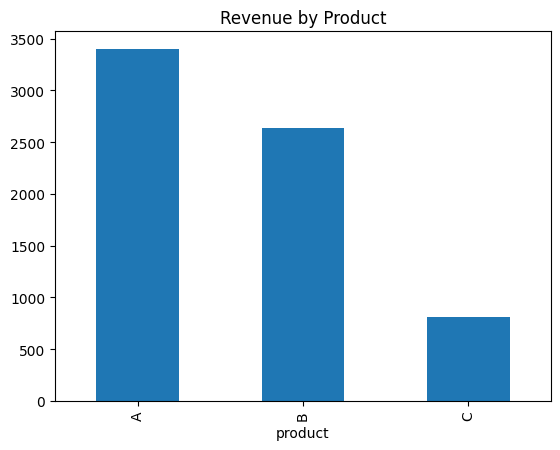

In [8]:
revenue_by_product.plot(kind="bar", title="Revenue by Product")
plt.show()
